In [1]:
import pandas
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ab_df = pandas.read_csv('2016-02-16/listings.csv.gz', compression='gzip', usecols=['host_id','host_since','smart_location'])
hosts = ab_df.groupby(by='host_id',as_index=True).agg({'host_since':lambda x: min(x),'smart_location': lambda x: min(x)})

In [3]:
cs_df = pandas.read_csv('couchsurfing/clean_hosts.csv',usecols=['people_id','member_since','city','state','status'])

def get_year(s):
    try:
        return datetime.datetime(int(s.split("Member since ")[1]), 1, 1)
    except:
        return None
    
cs_df['member_since'] = cs_df['member_since'].apply(get_year)
cs_df_defhosts = cs_df[(cs_df['status'] == 'Accepting Guests')]

In [4]:
unique(cs_df['status'].values)

array(['Accepting Guests', 'Maybe Accepting Guests',
       'Not Accepting Guests', 'Wants to Meet Up'], dtype=object)

In [5]:
hosts['host_since'] = hosts['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)

In [6]:
ab_since_global = hosts.groupby(by='host_since').agg(len)

In [7]:
ab_daily_roll = pandas.rolling_mean(ab_since_global, window=10)

(array([ 733408.,  733773.,  734138.,  734503.,  734869.,  735234.,
         735599.,  735964.]), <a list of 8 Text xticklabel objects>)

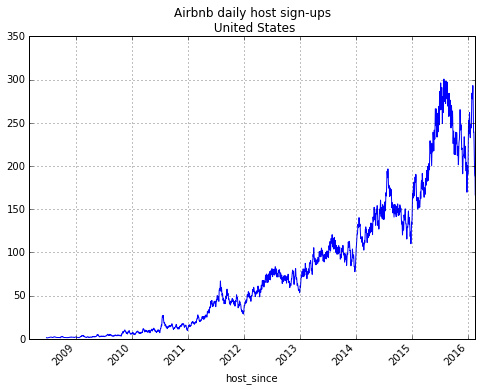

In [8]:
ax = ab_daily_roll.plot(legend=False, title='Airbnb daily host sign-ups \n United States', figsize=(8,6))
plt.xticks(rotation=45)

In [9]:
cs_since_global = cs_df.groupby(by='member_since').count()
cs_since_global_defhosts = cs_df_defhosts.groupby(by='member_since').count()

In [10]:
cs_since_global

,city,people_id,state,status
member_since,,,,
2003-01-01,53,53,53,53
2004-01-01,1396,1398,1398,1398
2005-01-01,6854,6856,6856,6856
2006-01-01,10307,10321,10321,10321
2007-01-01,23286,23307,23307,23307
2008-01-01,39086,39110,39110,39110
2009-01-01,47375,47427,47427,47427
2010-01-01,47326,47385,47385,47385
2011-01-01,36424,36491,36491,36491


In [11]:
cs_since_global_defhosts

,city,people_id,state,status
member_since,,,,
2003-01-01,31,31,31,31
2004-01-01,867,868,868,868
2005-01-01,3835,3837,3837,3837
2006-01-01,6038,6046,6046,6046
2007-01-01,13958,13967,13967,13967
2008-01-01,23593,23604,23604,23604
2009-01-01,28885,28905,28905,28905
2010-01-01,29183,29206,29206,29206
2011-01-01,20815,20840,20840,20840


In [12]:
cs_year_roll = pandas.rolling_mean(cs_since_global['people_id'], window=2)
cs_year_roll_defhosts = pandas.rolling_mean(cs_since_global_defhosts['people_id'], window=2)



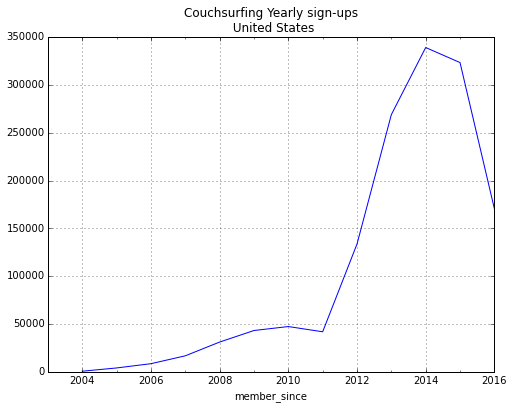

In [13]:
cs_year_roll.plot(title="Couchsurfing Yearly sign-ups\n United States", figsize=(8,6))

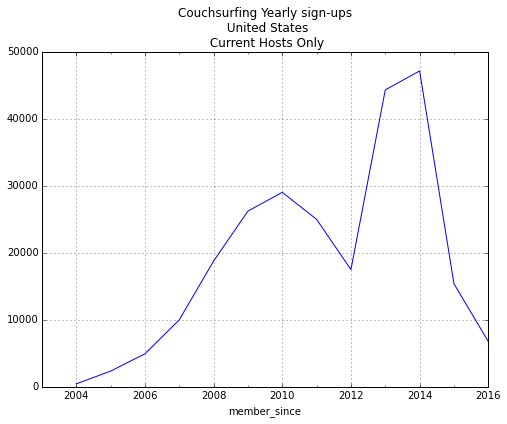

In [14]:
cs_year_roll_defhosts.plot(title="Couchsurfing Yearly sign-ups\n United States\n Current Hosts Only", figsize=(8,6))

In [15]:
ab_since_year = ab_since_global.groupby(by=lambda x: x.year).agg(sum)
cs_since_year = pandas.DataFrame(cs_since_global.groupby(by=lambda x: x.year).agg(sum)['people_id'])
cs_since_year_defhosts = pandas.DataFrame(cs_since_global_defhosts.groupby(by=lambda x: x.year).agg(sum)['people_id'])

In [16]:
ab_since_year.columns = ['signups']
cs_since_year.columns = ['signups']
cs_since_year_defhosts.columns = ['signups']

In [17]:
abcs = ab_since_year.join(cs_since_year,how='outer',lsuffix='_ab', rsuffix='_cs')
abcs_all= abcs.join(cs_since_year_defhosts, rsuffix='_cs_definitehosts')
abcsdefhost = ab_since_year.join(cs_since_year_defhosts,how='outer',lsuffix="_ab", rsuffix='_cs_definitehosts')

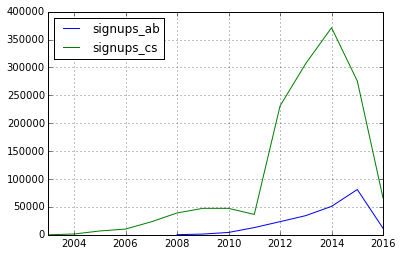

In [18]:
abcs.plot()

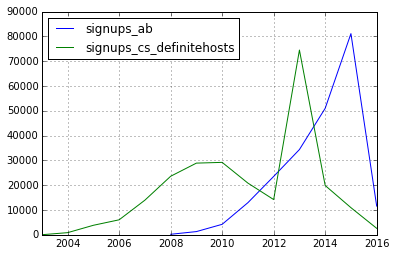

In [19]:
abcsdefhost.plot()

In [20]:
abcs_all.ix[2008:2015].corr()

,signups_ab,signups_cs,signups
signups_ab,1.000000,0.807687,-0.141503
signups_cs,0.807687,1.000000,0.171282
signups,-0.141503,0.171282,1.000000


In [21]:
chisquare(abcs)

array([[             nan,   4.82693380e+01],
       [             nan,   1.45102199e+03],
       [             nan,   6.94444251e+03],
       [             nan,   1.04553876e+04],
       [             nan,   2.30823375e+04],
       [  2.12996116e+02,   3.95523034e+04],
       [  1.31750748e+03,   4.77674344e+04],
       [  4.19482096e+03,   4.75727548e+04],
       [  1.27955222e+04,   3.59702146e+04],
       [  2.39807845e+04,   2.32425591e+05],
       [  3.47455508e+04,   3.06241111e+05],
       [  5.11141279e+04,   3.71264145e+05],
       [  8.12227822e+04,   2.75010586e+05],
       [  1.15746254e+04,   6.57959273e+04]])

In [22]:
abcs.corr()

,signups_ab,signups_cs
signups_ab,1.000000,0.814058
signups_cs,0.814058,1.000000


In [23]:
abcsdefhost.corr()

,signups_ab,signups_cs_definitehosts
signups_ab,1.0000,-0.0536
signups_cs_definitehosts,-0.0536,1.0000


BY CITY
========

In [113]:
state_dict = dict( (('Alabama', 'AL'),
       ('Alaska', 'AK'),
       ('Arizona', 'AZ'),
       ('Arkansas', 'AR'),
       ('California', 'CA'),
       ('Colorado', 'CO'),
       ('Connecticut', 'CT'),
       ('Delaware', 'DE'),
       ('District of Columbia', 'DC'),
       ('Florida', 'FL'),
       ('Georgia', 'GA'),
       ('Hawaii', 'HI'),
       ('Idaho', 'ID'),
       ('Illinois', 'IL'),
       ('Indiana', 'IN'),
       ('Iowa', 'IA'),
       ('Kansas', 'KS'),
       ('Kentucky', 'KY'),
       ('Louisiana', 'LA'),
       ('Maine', 'ME'),
       ('Maryland', 'MD'),
       ('Massachusetts', 'MA'),
       ('Michigan', 'MI'),
       ('Minnesota', 'MN'),
       ('Mississippi', 'MS'),
       ('Missouri', 'MO'),
       ('Montana', 'MT'),
       ('Nebraska', 'NE'),
       ('Nevada', 'NV'),
       ('New Hampshire', 'NH'),
       ('New Jersey', 'NJ'),
       ('New Mexico', 'NM'),
       ('New York', 'NY'),
       ('North Carolina', 'NC'),
       ('North Dakota', 'ND'),
       ('Ohio', 'OH'),
       ('Oklahoma', 'OK'),
       ('Oregon', 'OR'),
       ('Pennsylvania', 'PA'),
       ('Rhode Island', 'RI'),
       ('South Carolina', 'SC'),
       ('South Dakota', 'SD'),
       ('Tennessee', 'TN'),
       ('Texas', 'TX'),
       ('Utah', 'UT'),
       ('Vermont', 'VT'),
       ('Virginia', 'VA'),
       ('Washington', 'WA'),
       ('West Virginia', 'WV'),
       ('Wisconsin', 'WI'),
       ('Wyoming', 'WY')) )

def state_lookup(s):
    if len(s) ==2:
        return s.lower()
    else:
        try:
            return state_dict[s].lower()
        except KeyError:
            print(s)
            return float('nan')

In [114]:
len(cs_df)
cs_df.dropna(inplace=True)
len(cs_df)

1439269

In [115]:
cs_df['state'] = cs_df['state'].map(state_lookup)
cs_df['city'] = cs_df['city'].apply(lambda x: x.strip().lower())
cs_df['state'] = cs_df['state'].apply(lambda x: x.strip().lower())
cs_df['citystate'] = cs_df['city'] + '_' + cs_df['state']
cs_df['year'] = cs_df['member_since'].apply(lambda x: x.year)

In [116]:
len(cs_df)
cs_df.dropna(inplace=True)
len(cs_df)

1439269

In [117]:
cs_df_all = cs_df[['citystate','year','people_id']]
cs_df_definite = cs_df[cs_df['status'] == 'Accepting Guests'][['citystate','year','people_id']]

In [118]:
cs_citystate = cs_df_definite.groupby(by=['citystate','year']).agg(len)

In [119]:
cs_citystate.columns = ['signups']

In [120]:
ab_loc = pandas.read_csv('2016-02-16/listings.csv.gz', compression='gzip', usecols=['host_id','host_since','city','state'])
hosts_loc = ab_df.groupby(by='host_id',as_index=True).agg(min)

In [124]:
print(len(ab_loc))
ab_loc.dropna(inplace=True)
print(len(ab_loc))

337213
336140


In [125]:
ab_loc['city'] = ab_loc['city'].apply(lambda x: x.strip().lower())
ab_loc['state'] = ab_loc['state'].apply(lambda x: x.strip().lower())
ab_loc['citystate'] = ab_loc['city'] + '_' + ab_loc['state']
ab_loc['host_since'] = ab_loc['host_since'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d') if isinstance(x,str) else x)
ab_loc['year'] = ab_loc['host_since'].apply(lambda x: x.year)

In [126]:
ab_loc = ab_loc[['citystate','year','host_id']]
ab_citystate = ab_loc.groupby(by=['citystate','year']).agg(len)

In [127]:
ab_citystate.columns = ['signups']

In [128]:
abcs_citystate = pandas.merge(cs_citystate, ab_citystate, how='outer', left_index=True, right_index=True, suffixes=('_cs','_ab'))

In [129]:
abcs_citystate.fillna(0, inplace=True)

In [130]:
abcs_citystate.corr()

,signups_cs,signups_ab
signups_cs,1.00000,0.50181
signups_ab,0.50181,1.00000


In [131]:
cs_cum = abcs_citystate.unstack()['signups_cs'].sum(axis=1)
ab_cum = abcs_citystate.unstack()['signups_ab'].sum(axis=1)

In [139]:
dual_min = 100
big_cities = abcs_citystate.unstack().ix[ab_cum >=dual_min].ix[cs_cum >=dual_min]
small_cities = abcs_citystate.unstack().ix[ab_cum <dual_min].ix[cs_cum <dual_min]

# City Size in General, Correlations

In [138]:
big_cities.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,0.483983
signups_ab,0.483983,1.000000


In [141]:
small_cities.stack().corr()

,signups_cs,signups_ab
signups_cs,1.000000,-0.028088
signups_ab,-0.028088,1.000000


# City Size Graphs

In [168]:
big_cities_groups = big_cities.stack().groupby(level=0)

In [169]:
big_cities_corr = big_cities_groups.agg(lambda x: x.corr().iloc[1,0])

In [170]:
#this is not dangerous just because agg returned weird
del big_cities_corr['signups_ab']
big_cities_corr.columns = ['signup_abcs_correlation']

In [178]:
big_cities_corr.sort(columns='signup_abcs_correlation')

,signup_abcs_correlation
citystate,
astoria_ny,-0.506768
bronx_ny,-0.435755
brooklyn_ny,-0.279580
kirkland_wa,-0.236943
henderson_nv,-0.215818
decatur_ga,-0.199390
saint augustine_fl,-0.175539
missoula_mt,-0.171322
mesa_az,-0.166080


In [209]:
big_cities_extremes = big_cities_corr.sort(columns='signup_abcs_correlation').iloc[0:15,].append(big_cities_corr.sort(columns='signup_abcs_correlation').iloc[-15:,])

# Top and Bottom 10 Cities by Host Signup Correlation

astoria_ny -0.506767846293
bronx_ny -0.43575505253
brooklyn_ny -0.279579570201
kirkland_wa -0.236943453306
henderson_nv -0.215818449024
decatur_ga -0.199389573153
saint augustine_fl -0.175538761362
missoula_mt -0.171321563498
mesa_az -0.166079694788
fremont_ca -0.136153752448
sarasota_fl -0.118963157211
aurora_co -0.111809655992
boca raton_fl -0.0956549577791
pensacola_fl -0.084540920962
encinitas_ca -0.0752002624336
san francisco_ca 0.433394645969
clearwater_fl 0.443348336762
alameda_ca 0.466479287199
new york_ny 0.475645375815
mountain view_ca 0.476090142653
west hollywood_ca 0.482007996392
durham_nc 0.513706009202
santa barbara_ca 0.517287284157
palo alto_ca 0.518319888303
berkeley_ca 0.547624972876
miami beach_fl 0.549096473116
savannah_ga 0.626666477869
santa monica_ca 0.672967338518
lafayette_la 0.674851852554
washington_dc 0.802517705277


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


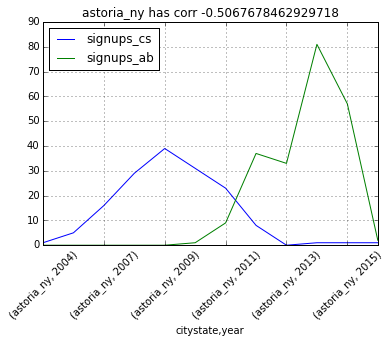

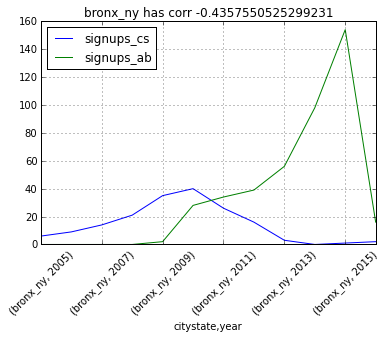

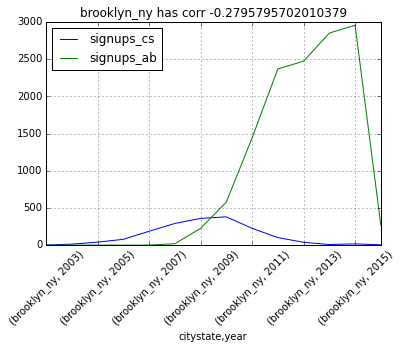

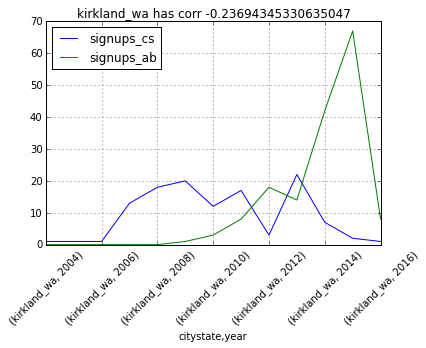

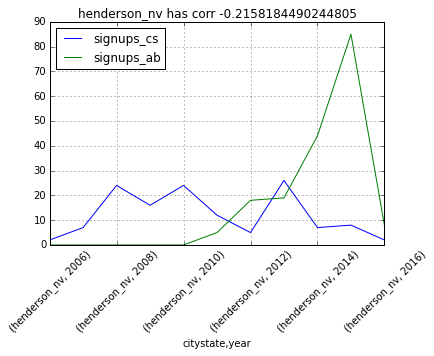

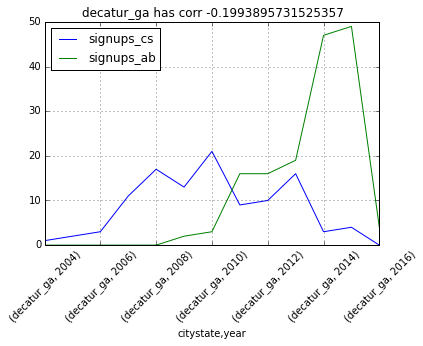

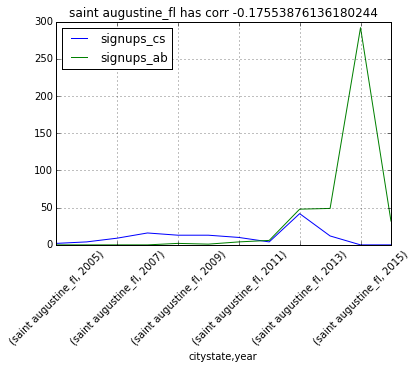

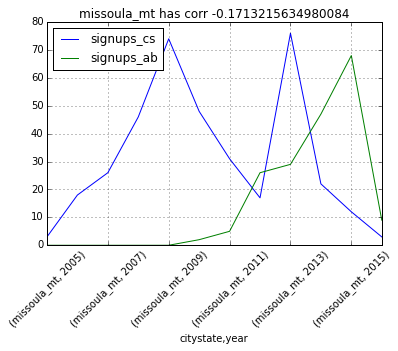

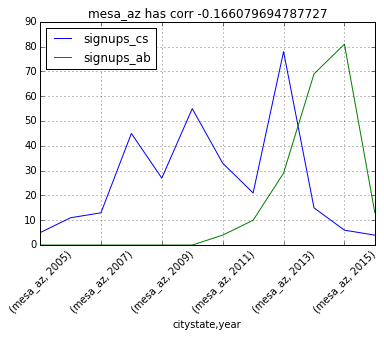

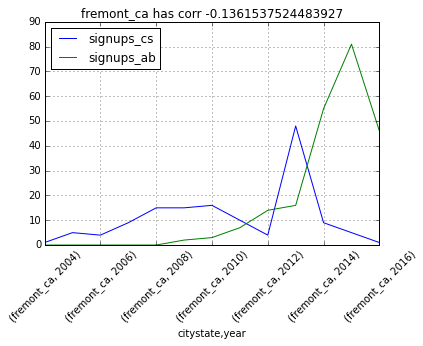

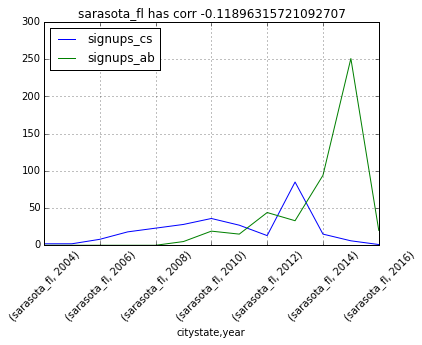

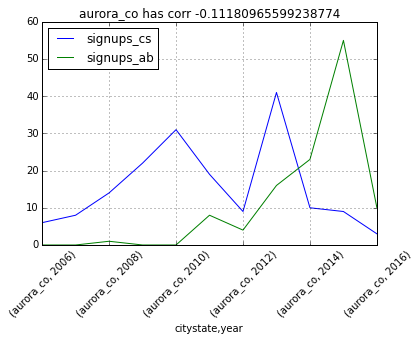

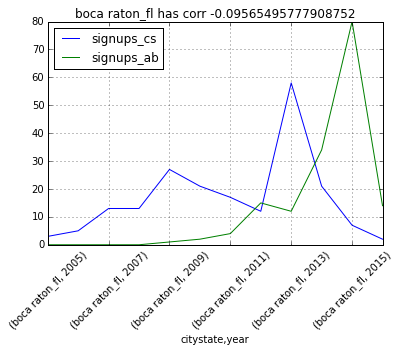

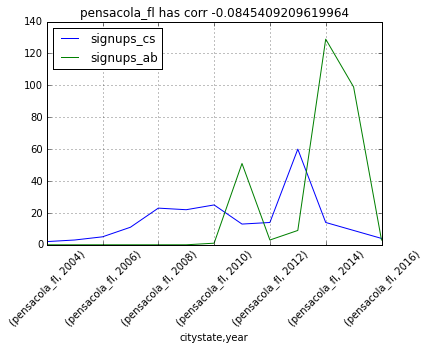

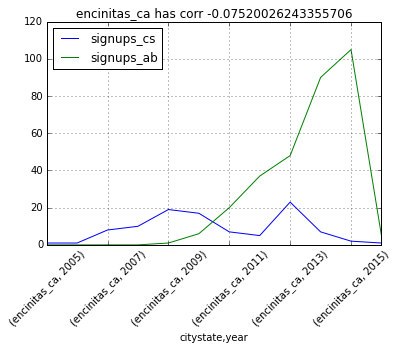

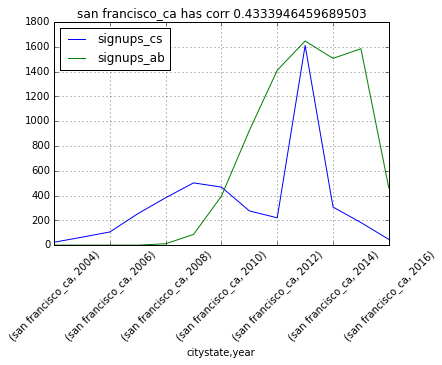

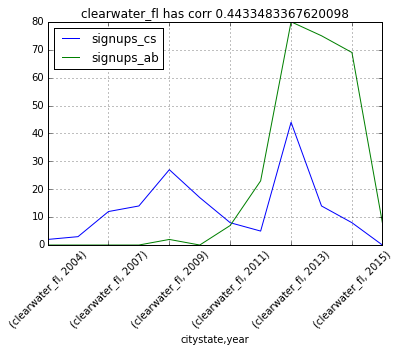

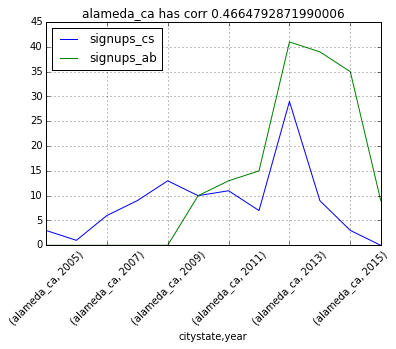

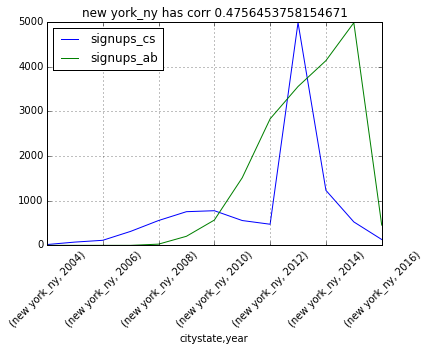

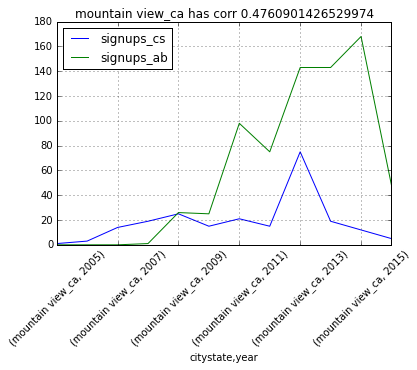

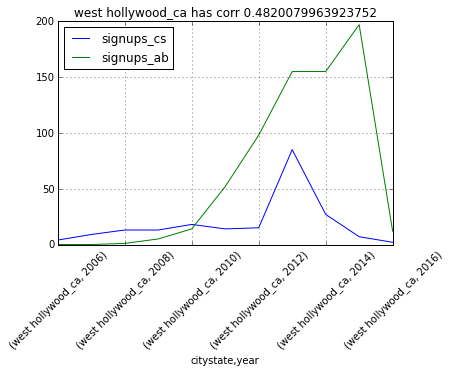

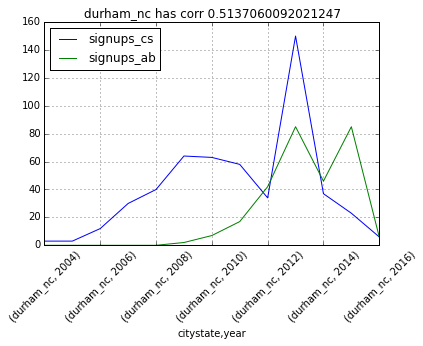

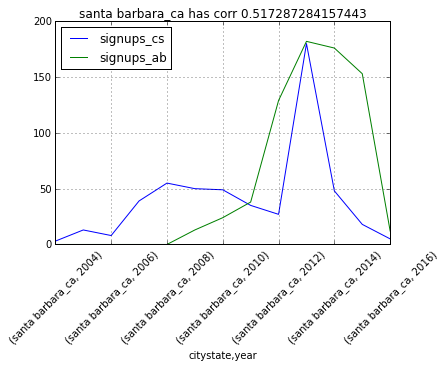

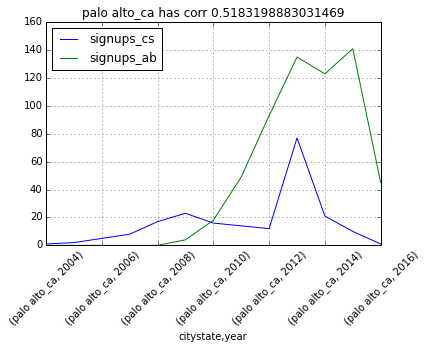

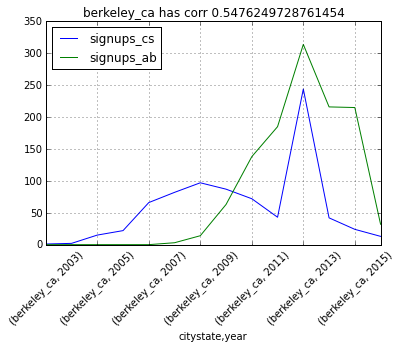

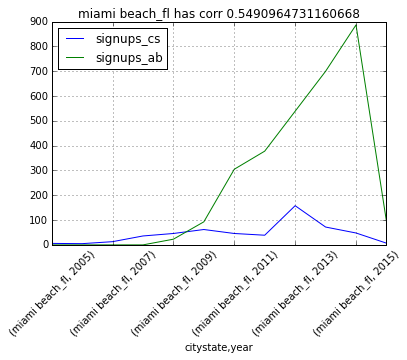

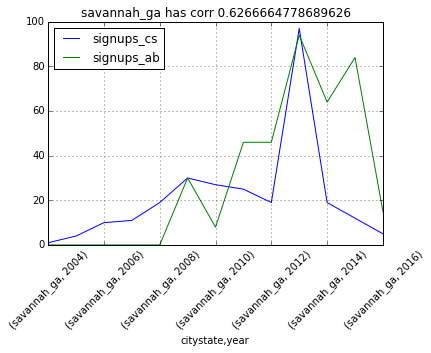

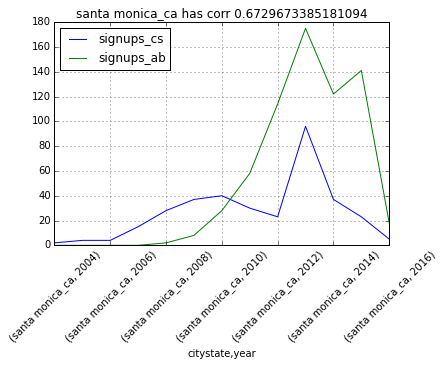

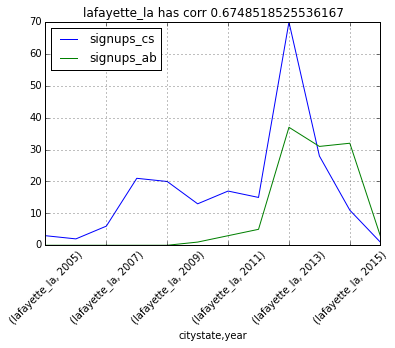

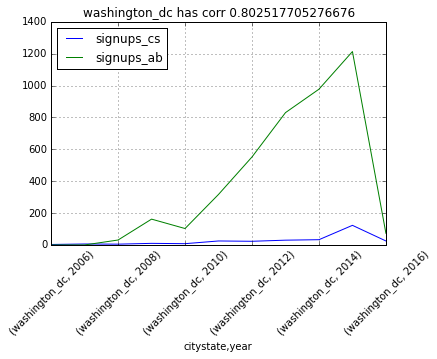

In [211]:
for city, corr in big_cities_extremes.iterrows():
    print(city, corr[0])
    for dfcity, df in big_cities_groups:
        if city==dfcity:
            ax = df.plot(title='{} has corr {}'.format(city, corr[0]), rot=45)

# Top and Bottom 10 Cities by AB size

In [208]:
big_cities_absize = big_cities_groups.agg(sum).sort('signups_ab', ascending=False)

In [205]:
big_cities_absize

,signups_cs,signups_ab
citystate,,
ventura_ca,173,100
plano_tx,174,100
beaverton_or,147,100
redmond_wa,106,100
lancaster_pa,199,100
greensboro_nc,355,102
birmingham_al,583,103
falls church_va,103,103
vancouver_wa,227,105
